## importing modules

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import chi2_contingency

## Reading data

In [2]:
df = pd.read_excel(r"C:\Users\JAWAHAR JOVAH\Downloads\data (1).xlsx")

In [3]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.shape

(3998, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [6]:
df.describe()

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


## Exploratory data analysis

In [7]:
# total null vlaues in entire dataset
df.isna().sum()
# there are no null vlaues

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

## uni-variate analysis

In [8]:
#removing the unnamed columns
df.drop("Unnamed: 0",inplace = True,axis = 1)

In [9]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


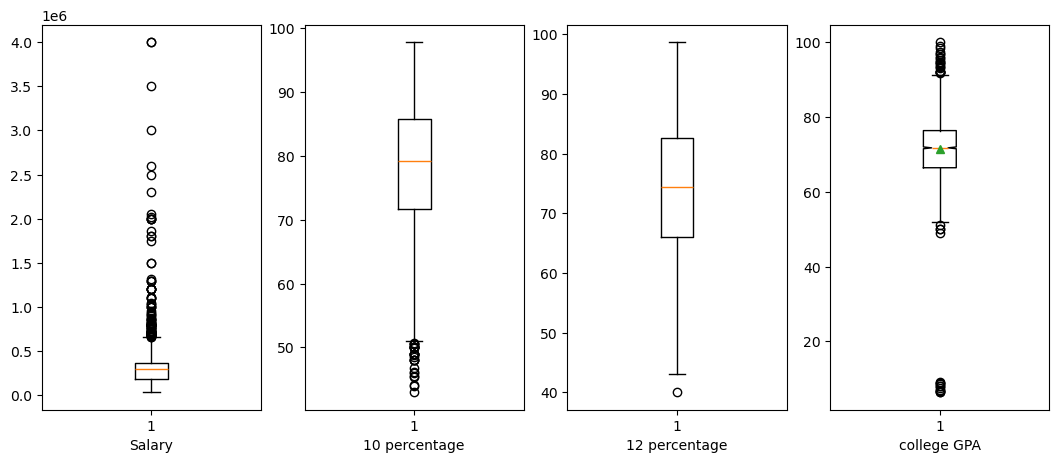

In [10]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(13,5))

ax1.set_xlabel("Salary")
ax1.boxplot(df["Salary"])


ax2.set_xlabel("10 percentage")
ax2.boxplot(df["10percentage"])


ax3.set_xlabel("12 percentage")
ax3.boxplot(df["12percentage"])


ax4.set_xlabel("college GPA")
ax4.boxplot(df["collegeGPA"],notch=True,showmeans=True,label=True)

plt.show()

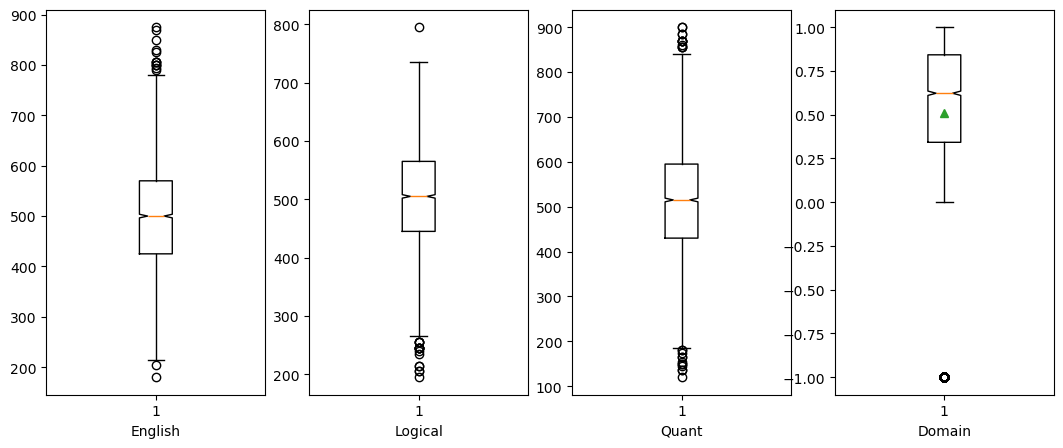

In [11]:
fig,(ax5,ax6,ax7,ax8) = plt.subplots(1,4,figsize=(13,5))

ax5.set_xlabel("English")
ax5.boxplot(df["English"],notch=True)


ax6.set_xlabel("Logical")
ax6.boxplot(df["Logical"],notch=True)


ax7.set_xlabel("Quant")
ax7.boxplot(df["Quant"],notch=True)


ax8.set_xlabel("Domain")
ax8.boxplot(df["Domain"],notch=True,showmeans=True)

plt.show()

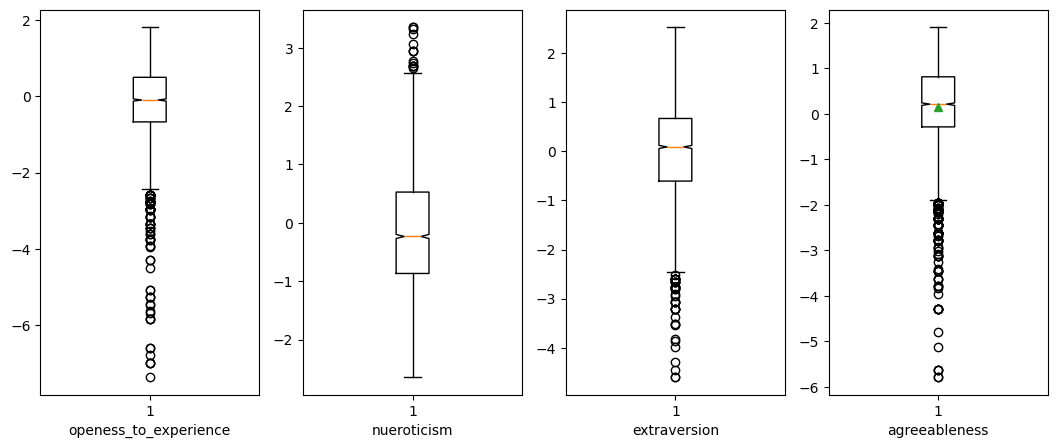

In [12]:
fig,(ax5,ax6,ax7,ax8) = plt.subplots(1,4,figsize=(13,5))

ax5.set_xlabel("openess_to_experience")
ax5.boxplot(df["openess_to_experience"],notch=True)


ax6.set_xlabel("nueroticism")
ax6.boxplot(df["nueroticism"],notch=True)


ax7.set_xlabel("extraversion")
ax7.boxplot(df["extraversion"],notch=True)


ax8.set_xlabel("agreeableness")
ax8.boxplot(df["agreeableness"],notch=True,showmeans=True)

plt.show()

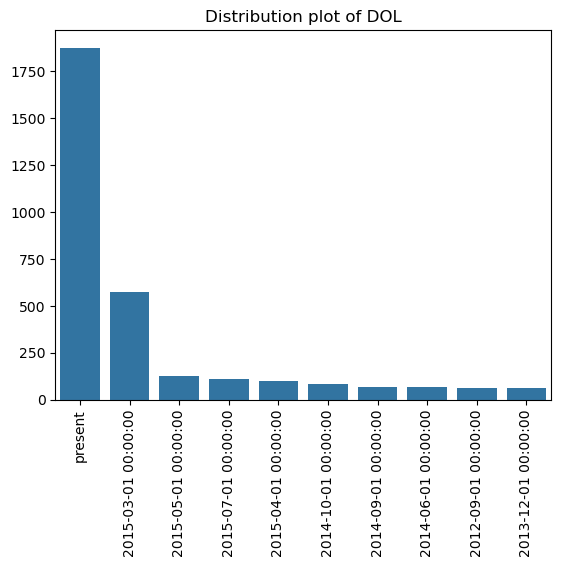

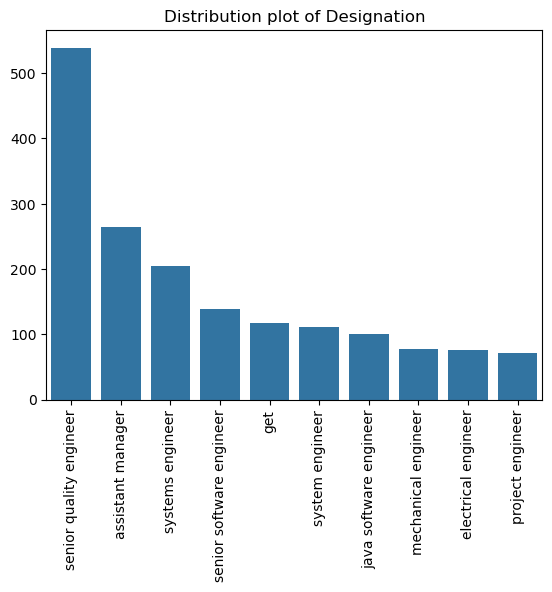

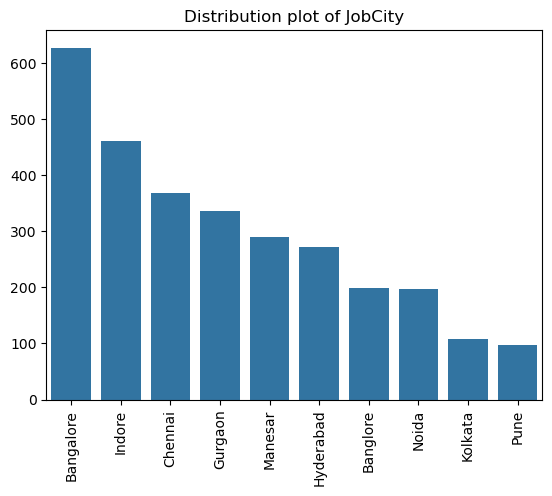

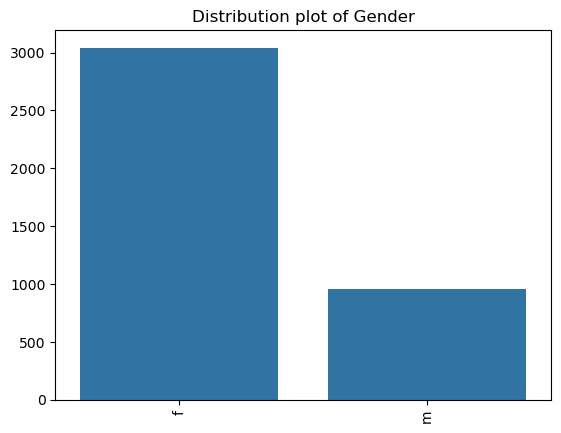

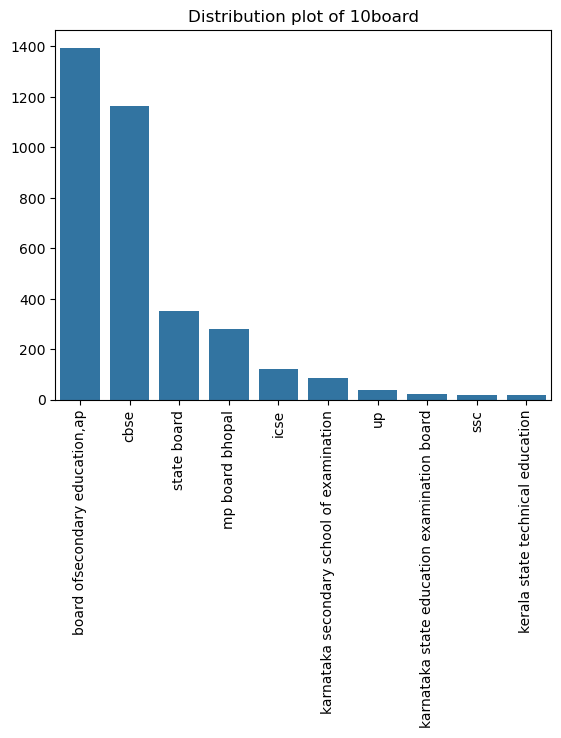

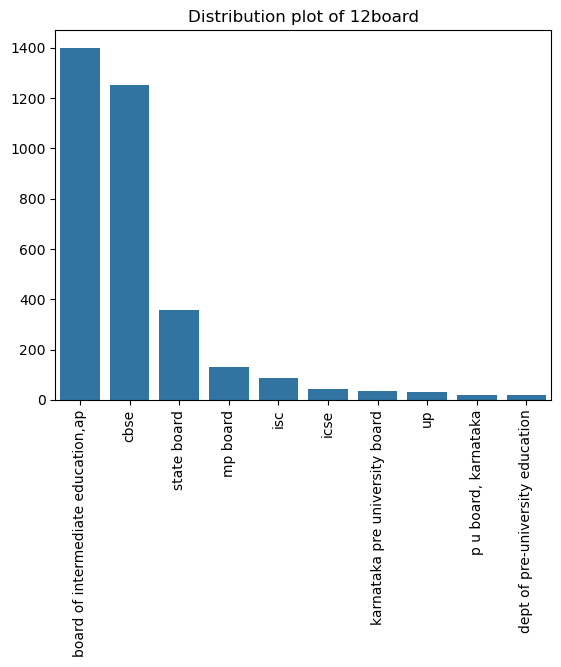

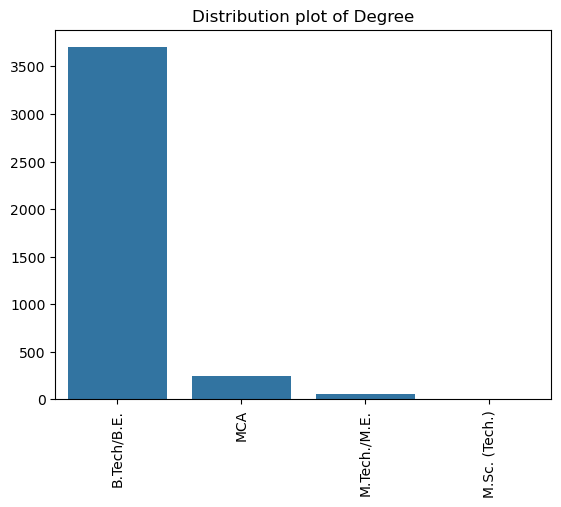

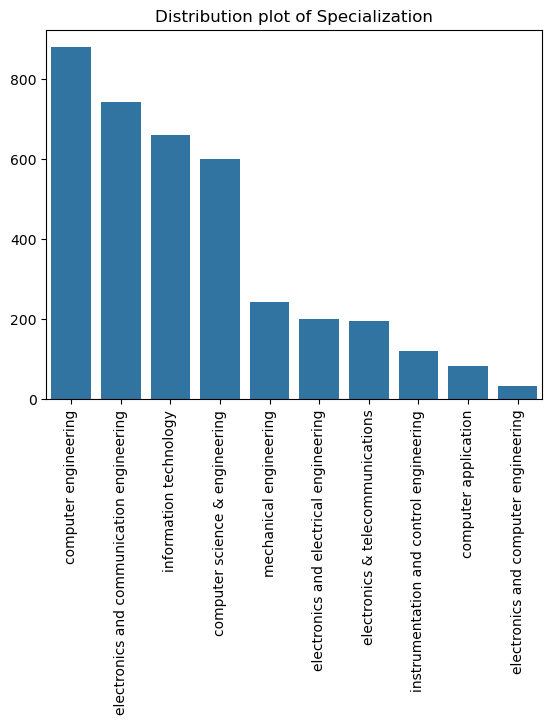

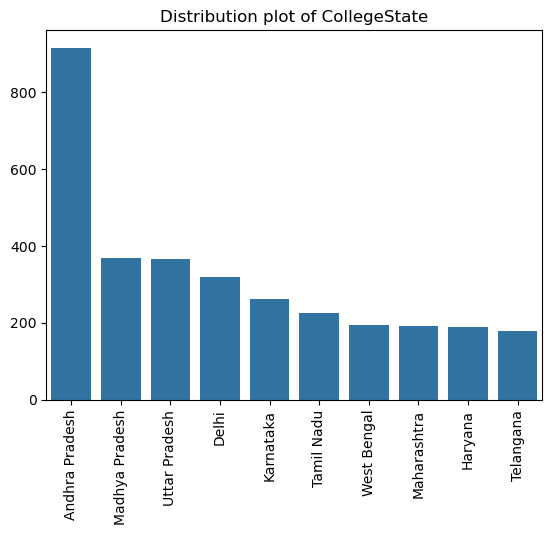

In [13]:
for i in df.columns:
    
    if df[i].dtype == "object" :
        
        plt.title(f"Distribution plot of {i}")
        sns.barplot(x=df[i].unique()[:10],y=np.array(df[i].value_counts()[:10]),)
        plt.xticks(rotation=90)
        plt.show()  
    

#### Observations :-

* Most of the people still working
* Most of the employees designation is senior quality engineer
* Many jobs are placed in Bangalore
* There are more females than males
* Many af the employees done their board of secondary education in AP and most of the employees done in CBSC.
* ssc and CBSC are most done boards of all.
* Employees went to option B.Tech/ B.E after their 12th.
* In the company every employees have done their B.Tech and some of the employees gone for MCA and M.Tech
* Computer engineering is most choosen course
* 2x people studied in Andhra pradesh

## Bivariate analysis

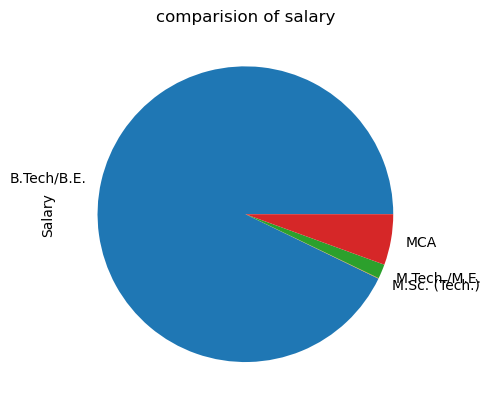

In [14]:
gen_sal = df.groupby("Degree")[["Salary"]].sum()
gen_sal.plot(kind="pie",y="Salary",legend=False,title="comparision of salary",)

plt.show()


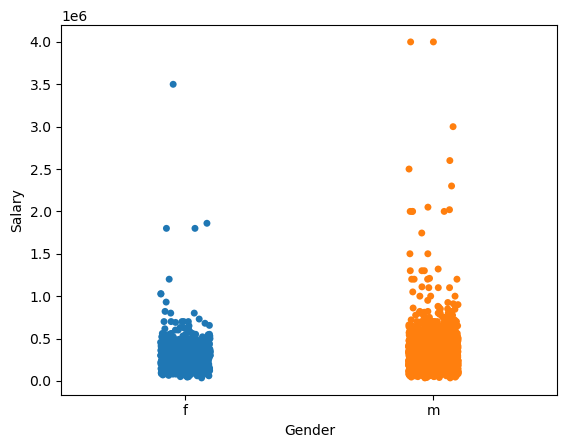

In [15]:
# relationship between gender and salary
sns.stripplot(x=df.Gender,y=df.Salary,hue=df.Gender)
plt.show()

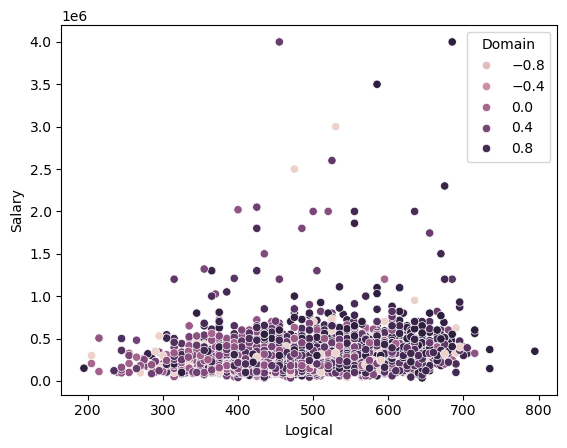

In [16]:
sns.scatterplot(x=df.Logical,y = df.Salary,hue=df.Domain)
plt.show()

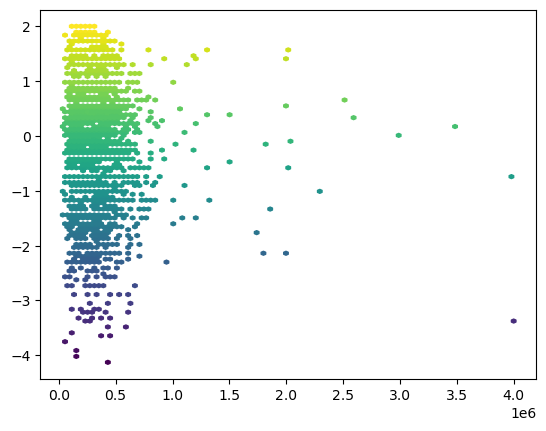

In [17]:
plt.hexbin(x=df.Salary,y=df.conscientiousness,C=df.conscientiousness)
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

#### catgorical - catgorical

<Axes: xlabel='Designation'>

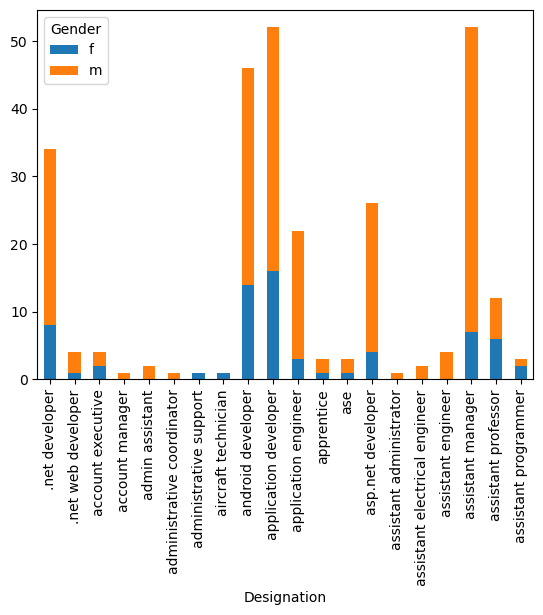

In [33]:
pvt = df.pivot_table(index="Designation",columns='Gender',values="Salary",aggfunc='count').fillna(0)[:20]
pvt.plot(kind="bar",stacked=True,)

## Reasearch Question

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” 

In [56]:

specialization_columns = ['ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
data_filtered = df[['Gender'] + specialization_columns]

data_filtered = data_filtered.replace(-1, pd.NA)

summary_table = data_filtered.melt(id_vars='Gender', value_vars=specialization_columns, var_name='Specialization', value_name='Value')
summary_table = summary_table.dropna(subset=['Value'])  
gender_specialization_count = summary_table.groupby(['Gender', 'Specialization']).size().unstack(fill_value=0)

chi2, p, dof, expected = chi2_contingency(gender_specialization_count)
gender_specialization_count, p


(Specialization  CivilEngg  ComputerScience  ElectricalEngg  MechanicalEngg  \
 Gender                                                                       
 f                       7              221              30              17   
 m                      35              681             131             218   
 
 Specialization  TelecomEngg  
 Gender                       
 f                        94  
 m                       280  ,
 1.486278445299714e-07)